# SKINCARE RECOMMENDED SYSTEM

## Content Based Skincare Recommendation System using Cosine Similarity based on:
> * Skintype
> * Ingredients

> ## DATA EXPLORATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('cosmetics.csv')

In [4]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [5]:
# Tidak ada data null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

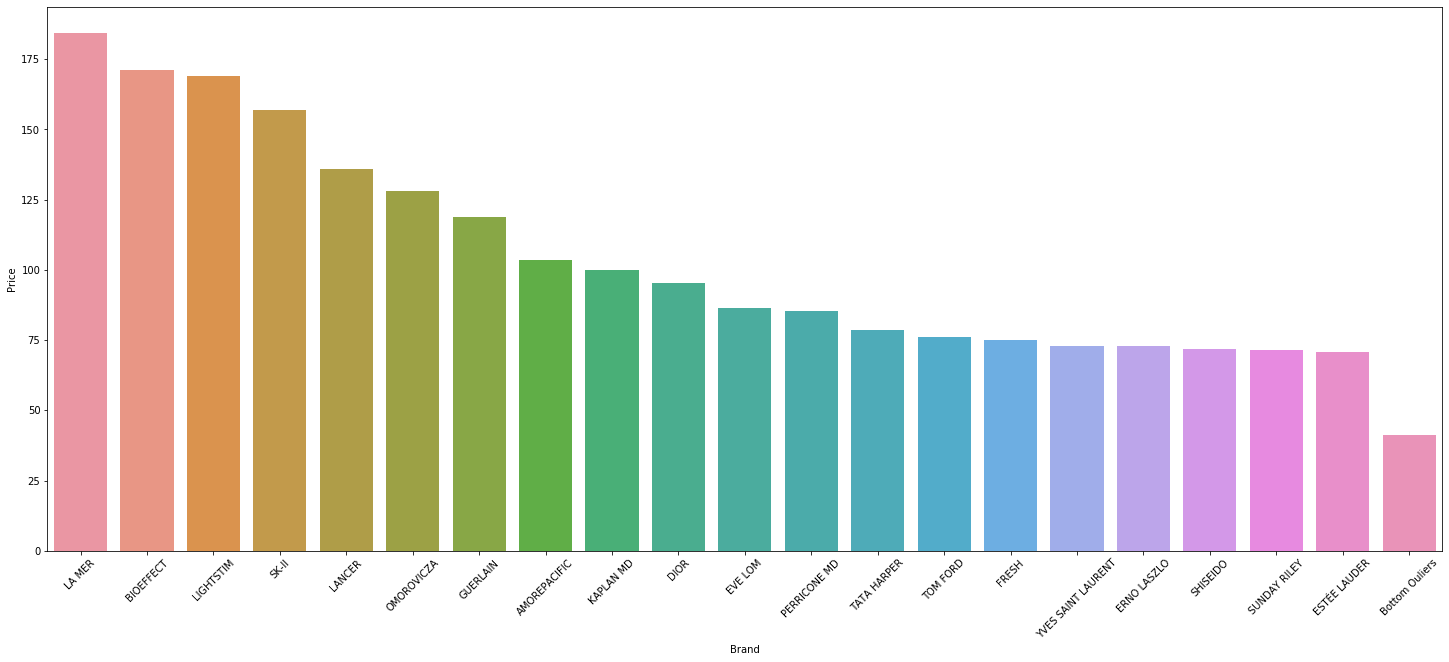

In [42]:
# Berikut merupakan TOP 20 brand berdasarkan harga yang ada di Sephora
plt.figure(figsize=(25,10))
sns.barplot(x='Brand', y='Price', data=df_price_top)
plt.xticks(rotation=45)

In [46]:
df_rank = df.groupby('Brand')['Rank'].mean().sort_values(ascending=False)
df_rank = df_rank.to_frame()
df_rank = df_rank.reset_index()
df_rank

,Brand,Rank
0,CLARISONIC,5.0000
1,NURSE JAMIE,5.0000
2,BIOEFFECT,4.9000
3,GO-TO,4.8500
4,PRIVATE DOCTOR,4.8000
...,...,...
111,YVES SAINT LAURENT,3.4000
112,EVE LOM,3.3625
113,FOREO,3.2375
114,ST. TROPEZ TANNING ESSENTIALS,2.4000


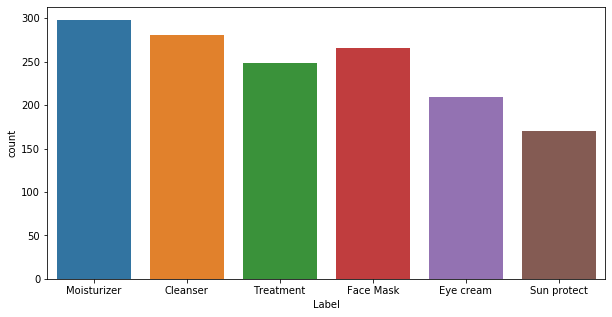

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='Label', data=df)

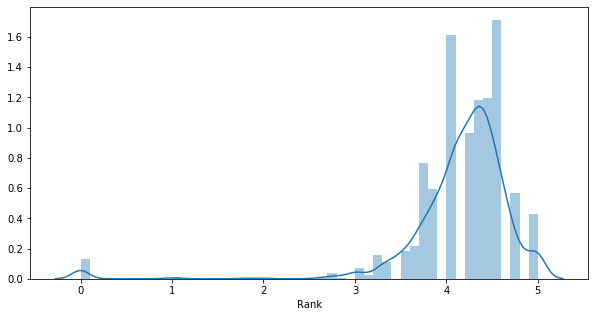

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(df['Rank'])

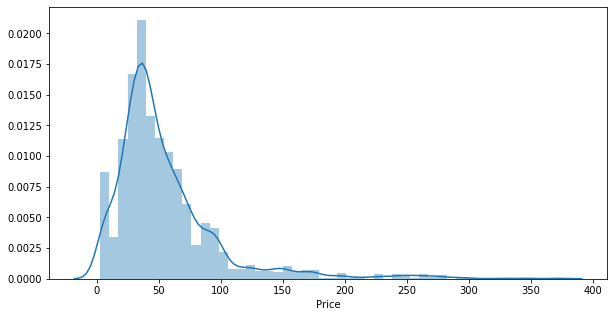

In [40]:
plt.figure(figsize=(10,5))
sns.distplot(df['Price'])

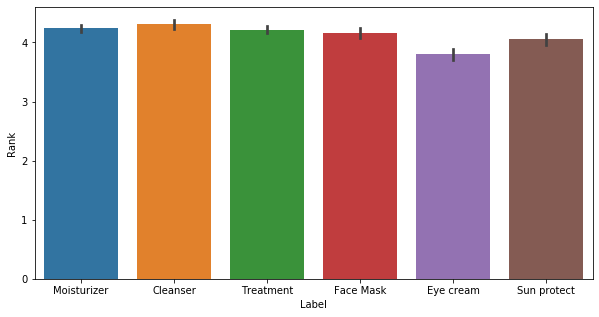

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(y='Rank', x='Label', data=df)

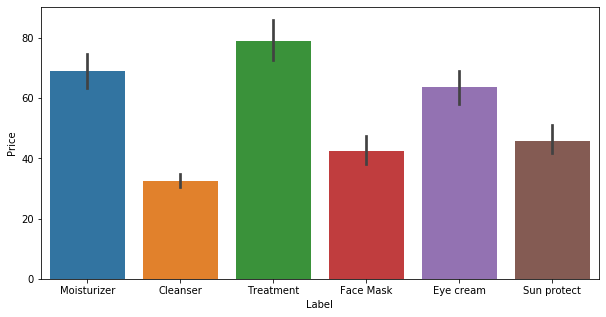

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(y='Price', x='Label', data=df)

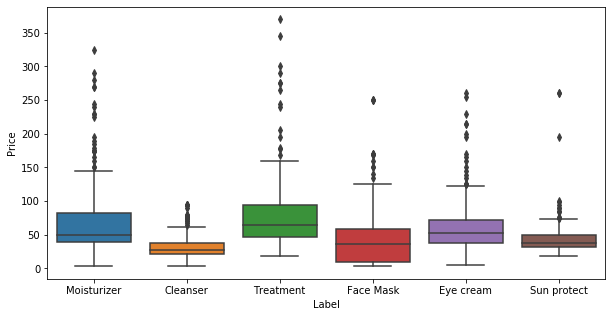

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Price', x='Label', data=df)

In [47]:
df.groupby('Label')['Price'].mean().sort_values(ascending=False)

Label
Treatment      79.177419
Moisturizer    69.087248
Eye cream      63.602871
Sun protect    45.905882
Face Mask      42.624060
Cleanser       32.601423
Name: Price, dtype: float64

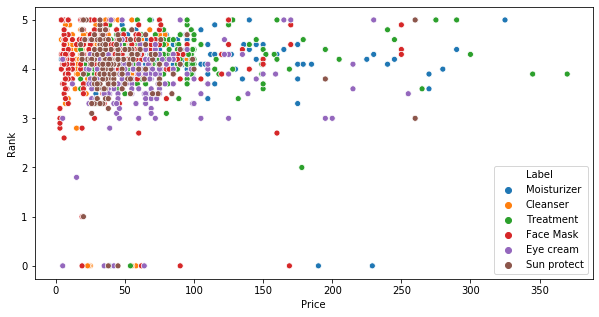

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='Rank', x='Price', data=df, hue='Label')

In [68]:
df.corr()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
Price,1.000000,-0.025215,0.012575,0.065525,0.049230,0.003978,0.007621
Rank,-0.025215,1.000000,0.036904,0.026982,0.051926,0.021041,0.015946
Combination,0.012575,0.036904,1.000000,0.830784,0.927966,0.882528,0.689316
Dry,0.065525,0.026982,0.830784,1.000000,0.874436,0.745767,0.722367
Normal,0.049230,0.051926,0.927966,0.874436,1.000000,0.835227,0.713320
Oily,0.003978,0.021041,0.882528,0.745767,0.835227,1.000000,0.648097
Sensitive,0.007621,0.015946,0.689316,0.722367,0.713320,0.648097,1.000000


In [66]:
df['Rank'].corr(df['Price'])

-0.025214717679718897

> ## DATA CLEANING

In [50]:
# Melihat apakah ada missing value pada dataset
# Pada dataset cosmetics tidak ada missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [53]:
# Melakukan konversi kolom Ingredients menjadi list untuk data cleaning
inglist = df['Ingredients'].tolist()
inglist[1000]

'-Vitamin K3 (menadione): Comfortably restores sensitive skin with a soothing effect. -Guava Leaf Extract: Rich in antioxidant vitamins that provide a protective, regeneration effect. -Aloe Vera Leaf Extract: Provides an excellent cooling and soothing benefit. STEP 01 Super Booster: Cetyl Ethylhexanoate, PEG-8 Glyceryl Isostearate, Phenoxyethanol, Ethylhexylglycerin, Citrus Aurantium Bergamia (Bergamot) Fruit Oil, Trihydroxystearin, Silica Dimethyl Silylate, Algin, Tetrapotassium Pyrophosphate, Calcium Sulfate. STEP 02 Soothing Liquid Ampoule: Water, Dipropylene Glycol, Aloe Barbadensis Leaf Extract, Psidium Guajava Leaf Extract, Guaiazulene, Menadione, PEG-60 Hydrogenated Castor Oil, Butylene Glycol, Citrus Aurantium Bergamia (Bergamot) Fruit Oil, Gardenia Florida Fruit Extract, Coptis Japonica Extract, 1,2-Hexanediol, Glycerin, Caprylic/Capric Triglyceride, Hydrogenated Lecithin, Polyglyceryl-10, Diisostearate, Phenoxyethanol, Ethylhexylglycerin.'

In [54]:
# Replace simbol-simbol pada list Ingredients
inglist = [i.replace('.', '') for i in inglist] 
inglist = [i.replace('*', '') for i in inglist] 
inglist = [i.replace(' -', ', ') for i in inglist] 
inglist = [i.replace('-', '') for i in inglist] 

In [55]:
# Masukkan list Ingredients yang sudah di cleaning ke kolom baru
df['IngredientsCleaned'] = inglist

In [56]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,IngredientsCleaned
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."


## Content Based Recommendation System using Cosine Similarity
> ## Based on Skintype

In [8]:
# Fitur kolom yang akan digunakan pada rekomendasi berdasarkan tipe kulit
df_skintype = df[['Name', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]

In [59]:
df_skintype

,Name,Combination,Dry,Normal,Oily,Sensitive
0,Crème de la Mer,1,1,1,1,1
1,Facial Treatment Essence,1,1,1,1,1
2,Protini™ Polypeptide Cream,1,1,1,1,0
3,The Moisturizing Soft Cream,1,1,1,1,1
4,Your Skin But Better™ CC+™ Cream with SPF 50+,1,1,1,1,1
...,...,...,...,...,...,...
1467,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,1,1,1,1,1
1468,Daily Deflector™ Waterlight Broad Spectrum SPF...,0,0,0,0,0
1469,Self Tan Dry Oil SPF 50,0,0,0,0,0
1470,Pro Light Self Tan Bronzing Mist,0,0,0,0,0


In [31]:
def recommend_product_skintype():
    product = input("Masukkan produk yang anda suka: ")

    import pandas as pd
    import numpy as np
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

    # Pemilihan csv dan kolom
    df = pd.read_csv('cosmetics.csv')
    df_skintype = df[['Name', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]

    # Mendapatkan nilai cosine_Similarity pada nama produk yang di input
    # Mencocokkan nama input produk ke dalam df_skintype dan drop kolom Name
    cosScore_skincare = cosine_similarity(df_skintype[df_skintype['Name']==product].drop('Name',axis=1),df_skintype.drop('Name',axis=1))
    # Mendapatkan score cosine_similarity dan dimasukkan ke df_cosScore
    df_cosScore = pd.concat([df_skintype[['Name']],pd.DataFrame(cosScore_skincare,index=['cosScore']).T],axis=1)

    # Membuat dataframe baru untuk kemudian di merge kedalam df_cosScore berdasarkan kesamaan Nama
    df_skintype_to_cos = df[['Name', 'Label', 'Brand', 'Rank', 'Price']]
    df_skintype_to_cos = pd.merge(df_cosScore, df_skintype_to_cos, on='Name')

    # Hasil dimasukkan ke dalam variabel rec yang berisi urutan cosine_similarity tertinggi terhadap nama produk yang diinput. Kemudian mengeluarkan hasil score tertinggi dengan nama yang tidak sama dengan produk input beserta kolom-kolom yang diinginkan yaitu Brand, Label, Rank dan Price.
    rec =  df_skintype_to_cos[df_skintype['Name']!=product].sort_values('cosScore',ascending=False)[['Name','Brand', 'Label', 'Rank', 'Price']][:10]

    return rec

In [32]:
recommend_product_skintype()

,Name,Brand,Label,Rank,Price
0,Crème de la Mer,LA MER,Moisturizer,4.1,175
832,Honey Potion Renewing Antioxidant Hydration Ma...,FARMACY,Face Mask,4.3,56
798,Micro-Blur™ Skin Perfector,KIEHL'S SINCE 1851,Treatment,4.5,35
799,Flash Hydro-Boost Instant Plumping Emulsion,REN CLEAN SKINCARE,Treatment,4.5,42
800,The Nightly Retinol + Peptide Anti-Aging Serum,BEAUTYBIO,Treatment,5.0,95
802,High Potency Classics: Firming Evening Repair,PERRICONE MD,Treatment,4.4,99
811,Crème Ancienne® Supreme Face Serum,FRESH,Treatment,4.8,240
818,Crème Ancienne Face Oil Elixir,FRESH,Treatment,3.6,265
826,ELEVATE Advanced Lift Contouring Cream,ALGENIST,Treatment,4.3,96
827,Mask Frenzy,PETER THOMAS ROTH,Face Mask,4.8,75


> ## Based on Ingredients

In [62]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,IngredientsCleaned
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."


In [43]:
def recommend_product_ing():
    product = input("Masukkan produk yang anda suka: ")

    import pandas as pd
    import numpy as np
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

    # Membaca data csv dan melakukan data cleaning pada kolom Ingredients yang kemudian dimasukkan kedalam kolom baru
    df = pd.read_csv('cosmetics.csv')

    inglist = df['Ingredients'].tolist()
    inglist = [i.replace('.', '') for i in inglist] 
    inglist = [i.replace('*', '') for i in inglist] 
    inglist = [i.replace(' -', ', ') for i in inglist] 
    inglist = [i.replace('-', '') for i in inglist] 
    inglist = [i.replace('  ', ' ') for i in inglist]

    df['IngredientsCleaned'] = inglist

    # Mengambil isi kolom IngredientsCleaned menggunakan CountVectorizer dan dipisah oleh koma
    # ming_a memiliki isi berupa matrix dari IngredientsCleaned
    cvr = CountVectorizer(tokenizer= lambda x:x.split(', '))
    ming_a = cvr.fit_transform(df['IngredientsCleaned'])

    # Matrix dari ming_a dimasukkan ke variabel ing untuk kemudian di convert menjadi array dan ambil dan aplikasikan nama kolom Ingredients Cleaned ke matrix 
    # Buat dataframe baru df_ing yang berisi gabungan dari kolom matrix+kolom pada variabel ing dan Nama produk
    ing = pd.DataFrame(ming_a.toarray(),columns=cvr.get_feature_names())
    df_ing = pd.concat([df[['Name']],ing],axis=1)

    # Melakukan sedikit data cleaning pada kolom yang memiliki spasi didepannya
    df_ing.rename(columns = {' 100% natural fragrance':'100% natural fragrance', ' camelia sinensis':'camelia sinensis', ' essential oil':'essential oil', '  hadasei3':'hadasei3'}, inplace=True)

    # Mendapatkan nilai cosine_Similarity pada nama produk yang di input
    # Mencocokkan nama input produk ke dalam df_ing dan drop kolom Name
    cosScore_skincare = cosine_similarity(df_ing[df_ing['Name']==product].drop('Name',axis=1),df_ing.drop('Name',axis=1))
    df_cosScore = pd.concat([df_ing[['Name']],pd.DataFrame(cosScore_skincare,index=['cosScore']).T],axis=1)

    # Membuat dataframe baru untuk kemudian di merge kedalam df_cosScore berdasarkan Nama
    df_ing_to_cos = df[['Name', 'Label', 'Brand', 'Rank', 'Price']]
    df_ing_to_cos = pd.merge(df_cosScore, df_ing_to_cos, on='Name')

    # Hasil dimasukkan ke dalam variabel rec yang berisi urutan cosine_similarity tertinggi terhadap nama produk yang diinput. Kemudian mengeluarkan hasil score tertinggi dengan nama yang tidak sama dengan produk input beserta kolom-kolom yang diinginkan yaitu Brand, Label, Rank dan Price.
    rec = df_ing_to_cos[df_ing['Name']!=product].sort_values('cosScore',ascending=False)[['Name','Brand', 'Label', 'Rank', 'Price']][:10]

    return rec

In [44]:
recommend_product_ing()

,Name,Brand,Label,Rank,Price
316,MakeUp-BreakUp Cool Cleansing Oil,BOSCIA,Cleanser,4.5,32
1226,Super-Cool De-Puffing Eye Balm,BOSCIA,Eye cream,3.6,26
516,Clear Complexion Tonic,BOSCIA,Cleanser,4.3,26
301,Green Clean Makeup Meltaway Cleansing Balm wit...,FARMACY,Cleanser,4.6,34
928,Water Fuse Hydro Sleep Mask,DR. JART+,Face Mask,4.4,48
806,Clear Complexion Moisturizer,BOSCIA,Treatment,3.6,36
1262,Water Fuse Hydro Soothe Eye Gel,DR. JART+,Eye cream,3.7,42
1034,Multi-Masking™ Medley,BOSCIA,Face Mask,4.1,18
1027,Energy Yellow Citrus & Honey Splash Mask,BLITHE,Face Mask,4.2,45
984,Soothing & Healing Green Tea Splash Mask,BLITHE,Face Mask,4.6,45
